# Correlation

In [1]:
import pandas_datareader as pdr
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
tickers = ['SPY', 'TLT']

start = dt.datetime(2008, 1, 1)
end = dt.datetime(2017, 12, 31)

data = pdr.get_data_yahoo(tickers, start, end)

In [3]:
data = data['Adj Close']

In [4]:
log_returns = np.log(data/data.shift())

In [5]:
log_returns.corr()

Symbols,SPY,TLT
Symbols,,
SPY,1.000000,-0.445482
TLT,-0.445482,1.000000


<IPython.core.display.Javascript object>


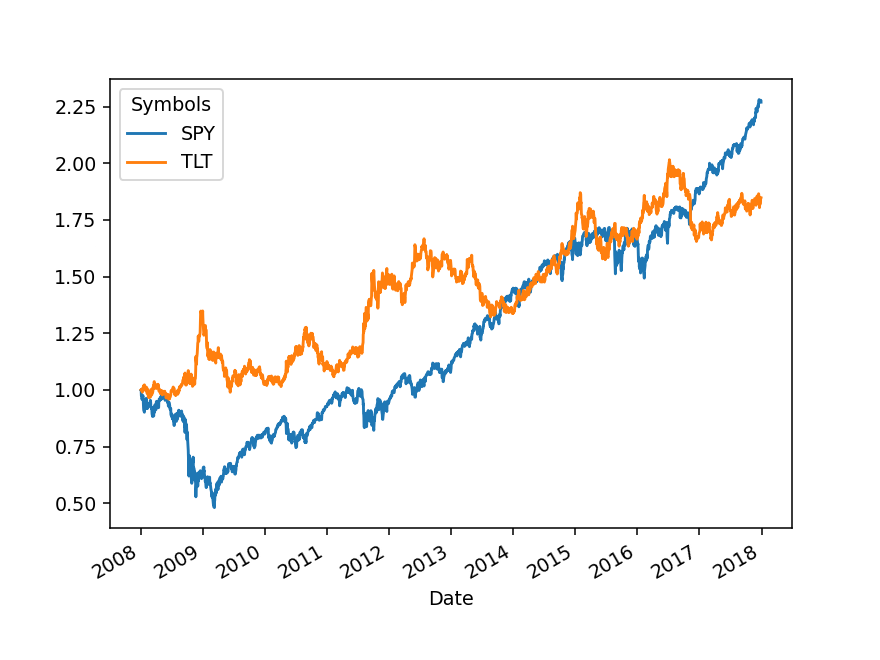

<AxesSubplot:xlabel='Date'>

In [7]:
fig, ax = plt.subplots()
(data/data.iloc[0]).plot(ax=ax)

<IPython.core.display.Javascript object>


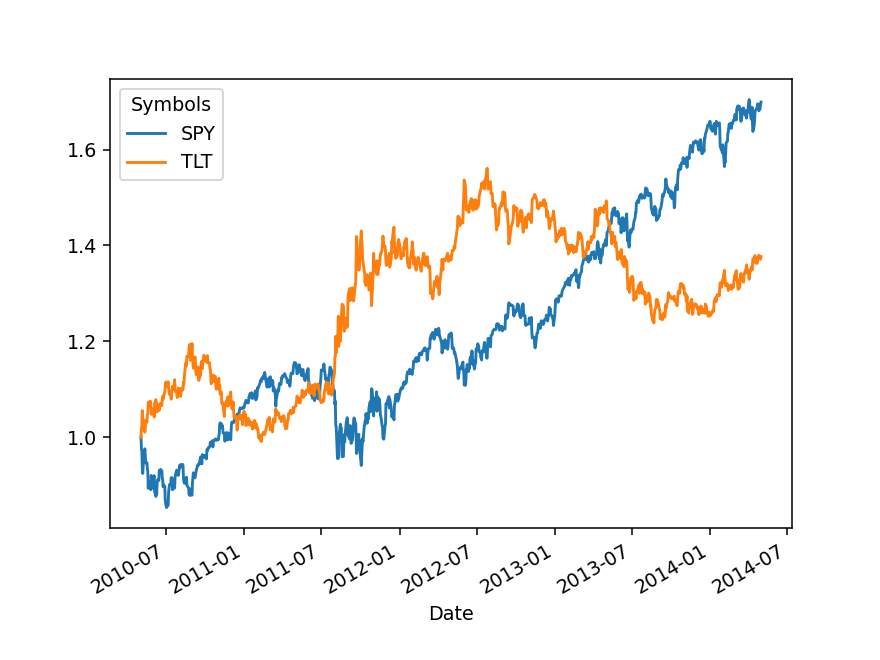

<AxesSubplot:xlabel='Date'>

In [8]:
data_set = data.loc['2010-05':'2014-04']

fig, ax = plt.subplots()
(data_set/data_set.iloc[0]).plot(ax=ax)

### Project
- Calculate the return (CAGR), maximal drawdown and volatility of TLT

#### Step 1
- Calculate the return (CAGR) of SPY and TLT

In [9]:
cagr_spy = (data['SPY'].iloc[-1]/data['SPY'].iloc[0])**(1/10) - 1
cagr_tlt = (data['TLT'].iloc[-1]/data['TLT'].iloc[0])**(1/10) - 1
cagr_spy, cagr_tlt

(0.08540695624698214, 0.06332297751840366)

#### Step 2
- Calculate the maximum drawdown of SPY and TLT

In [10]:
def max_drawdown(data):
    rolling_max = data.cummax()
    daily_drawdown = data/rolling_max - 1
    max_drawdown = daily_drawdown.cummin().iloc[-1]
    return max_drawdown

In [11]:
max_drawdown(data['SPY']), max_drawdown(data['TLT'])

(-0.5187373824520811, -0.26585384311824434)

#### step 3
- Calculate the volatility

In [12]:
log_returns.std()*(252**0.5)

Symbols
SPY    0.203319
TLT    0.151634
dtype: float64